In [26]:
import json

json_open = open('id893.json', 'r', encoding="utf-8")
json_load = json.load(json_open)

print(json_load)

d = json_load
print(d.keys())

{'url': '', 'tree_id': 893, 'bookmark': False, 'refs': '', 'data': {'items': {'artifacts': [{'width': 108, 'url': '', 'visible': True, 'refs': '', 'fT': 'The society', 'memo': '', 'id': 1, 'pos': {'x': 682.0007459083911, 'y': 74.99976375662325}, 'sT': 'become diverse'}, {'width': 169, 'url': '', 'visible': True, 'refs': '', 'fT': 'Marginalized/minority students', 'memo': '', 'id': 2, 'pos': {'y': 1201, 'x': 408}, 'sT': 'be in campus'}, {'width': 269, 'url': '', 'visible': True, 'refs': '', 'fT': 'Privileged students', 'memo': '', 'id': 3, 'pos': {'x': 768.9999929058401, 'y': 1078.9995279824466}, 'sT': 'have little awareness/interests in social justice'}, {'width': 240, 'url': '', 'visible': True, 'refs': '', 'fT': 'Students', 'memo': '', 'id': 5, 'pos': {'x': 541.9992162560886, 'y': 807.9992377026058}, 'sT': 'build a team to change the circumstance'}, {'width': 108, 'url': '', 'visible': True, 'refs': '', 'fT': 'Privileged students', 'memo': '', 'id': 6, 'pos': {'x': 908.9999961653305,

In [28]:
# ノード情報

nodes = d["data"]["items"]["artifacts"]
nodes[1]

{'width': 169,
 'url': '',
 'visible': True,
 'refs': '',
 'fT': 'Marginalized/minority students',
 'memo': '',
 'id': 2,
 'pos': {'y': 1201, 'x': 408},
 'sT': 'be in campus'}

In [29]:
# エッジ情報

arr = d["data"]["arrows"]["hasArtifactsOnly"]
arr[1]

{'url': '',
 'visible': True,
 'i1': 2,
 'refs': '',
 'd2': {'width': 367,
  'listId': 1,
  'stageY': 1078.0000176732824,
  'stageX': 1354.9997568176225},
 'memo': '',
 'id': 2,
 'i2': 7,
 'd1': {'width': 169, 'listId': 1, 'stageY': 1254, 'stageX': 1372}}

#### データフレームに格納して３次元の可視化

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import japanize_matplotlib

In [31]:
pointx = nodes[1]['pos']['x']
pointy = nodes[1]['pos']['y']
print(pointx, pointy)

408 1201


In [32]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['pos']['x'], -nodes[i]['pos']['y']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float) 
df

C:\Users\so030\AppData\Local\Temp\ipykernel_19440\581320520.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float)


,id,fT,x,y
0,1.0,The society,682.000746,-74.999764
1,2.0,Marginalized/minority students,408.000000,-1201.000000
2,3.0,Privileged students,768.999993,-1078.999528
3,5.0,Students,541.999216,-807.999238
4,6.0,Privileged students,908.999996,-1193.000001
5,7.0,Marginalized/minority students,390.999757,-1025.000018
6,8.0,Some students,766.999642,-935.000078
7,9.0,Some students,764.000050,-734.999143
8,10.0,Students who are eager to change the circumstance,730.999698,-863.999162
9,11.0,Student activists,419.999498,-626.998652


In [33]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['pos']['y'], nodes[i]['pos']['x']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float) 
df

C:\Users\so030\AppData\Local\Temp\ipykernel_19440\2856546357.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(lst, columns =['id', 'fT',  'x', 'y'], dtype = float)


,id,fT,x,y
0,1.0,The society,74.999764,682.000746
1,2.0,Marginalized/minority students,1201.000000,408.000000
2,3.0,Privileged students,1078.999528,768.999993
3,5.0,Students,807.999238,541.999216
4,6.0,Privileged students,1193.000001,908.999996
5,7.0,Marginalized/minority students,1025.000018,390.999757
6,8.0,Some students,935.000078,766.999642
7,9.0,Some students,734.999143,764.000050
8,10.0,Students who are eager to change the circumstance,863.999162,730.999698
9,11.0,Student activists,626.998652,419.999498


In [34]:
num = np.random.randint(1, 10, len(df))
print(num)
# print(num[0], len(num[0]))
df["num"] = num
df

[5 7 8 6 2 6 4 3 7 4 5 1 5 1 1 8 9 5 7 6 4 1 3 3 8 5 9 5 8 8 4 3 3 6 1]


,id,fT,x,y,num
0,1.0,The society,74.999764,682.000746,5
1,2.0,Marginalized/minority students,1201.000000,408.000000,7
2,3.0,Privileged students,1078.999528,768.999993,8
3,5.0,Students,807.999238,541.999216,6
4,6.0,Privileged students,1193.000001,908.999996,2
5,7.0,Marginalized/minority students,1025.000018,390.999757,6
6,8.0,Some students,935.000078,766.999642,4
7,9.0,Some students,734.999143,764.000050,3
8,10.0,Students who are eager to change the circumstance,863.999162,730.999698,7
9,11.0,Student activists,626.998652,419.999498,4


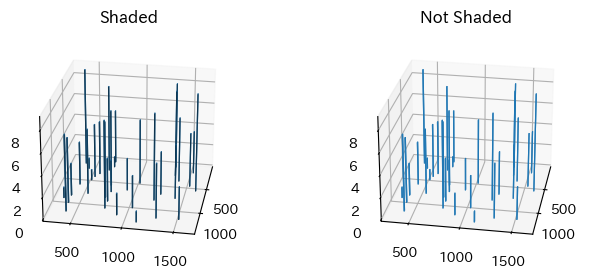

In [35]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# # fake data
# _x = np.random.randint(1, 120, 12)
# _y = np.random.randint(1, 150, 12)
# _xx, _yy = np.meshgrid(_x, _y)
# x, y = _xx.ravel(), _yy.ravel()

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

ax1.view_init(elev= 25, azim=10, roll=0)
ax2.view_init(elev= 25, azim=10, roll=0)

plt.show()

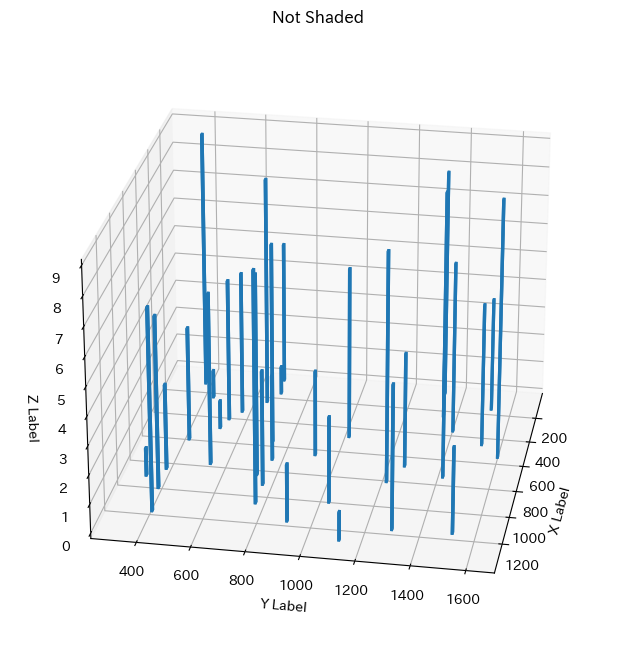

In [36]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')
ax2.view_init(elev= 25, azim=10, roll=0)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()

#### 座標付きネットワークの可視化

In [37]:
rels = []

for i in range(len(arr)):
  rels.append([arr[i]["i1"], arr[i]["i2"]])

{1.0: array([ 74.99976, 682.00073], dtype=float32), 2.0: array([1201.,  408.], dtype=float32), 3.0: array([1078.9995,  769.    ], dtype=float32), 5.0: array([807.99927, 541.9992 ], dtype=float32), 6.0: array([1193.,  909.], dtype=float32), 7.0: array([1025.     ,  390.99976], dtype=float32), 8.0: array([935.00006, 766.99963], dtype=float32), 9.0: array([734.99915, 764.00006], dtype=float32), 10.0: array([863.99915, 730.9997 ], dtype=float32), 11.0: array([626.99866, 419.9995 ], dtype=float32), 12.0: array([366.9971 , 572.99976], dtype=float32), 14.0: array([515.9996 , 516.99963], dtype=float32), 15.0: array([437.99884, 535.99963], dtype=float32), 16.0: array([266.00003, 436.9998 ], dtype=float32), 17.0: array([187.9999, 692.0002], dtype=float32), 18.0: array([270.00018, 652.0002 ], dtype=float32), 21.0: array([153.00008, 381.99988], dtype=float32), 24.0: array([1192., 1295.], dtype=float32), 25.0: array([597.00006, 738.00006], dtype=float32), 26.0: array([ 393.00003, 1402.     ], dtype

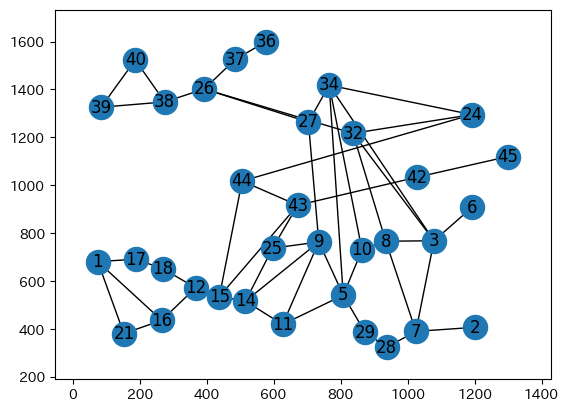

In [38]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

##### 例

{0: array([0.87904006, 0.4628497 ], dtype=float32), 1: array([0.14080356, 0.91446996], dtype=float32), 2: array([0.5973825 , 0.31090665], dtype=float32), 3: array([0.5515347, 0.4263308], dtype=float32), 4: array([0.60666734, 0.94396937], dtype=float32)}
[[0.87904006 0.4628497 ]
 [0.14080356 0.91446996]
 [0.5973825  0.31090665]
 [0.5515347  0.4263308 ]
 [0.60666734 0.94396937]] <class 'numpy.ndarray'>


C:\Users\so030\AppData\Local\Temp\ipykernel_19440\2596622035.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


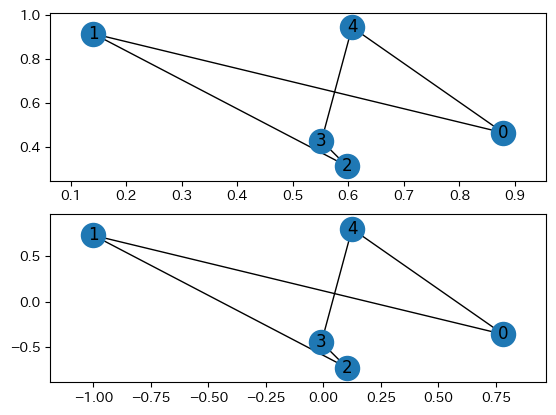

In [39]:
# https://stackoverflow.com/questions/63496724/how-to-use-networkxs-rescale-layout

G = nx.Graph()
G.add_edges_from([[0,1],[1,2],[2,3],[3,4],[4,0]])
pos = nx.random_layout(G)
coords = np.array(list(pos.values()))
# print(type(coords))
print(pos)
print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(211)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on

plt.subplot(212)
new_pos = nx.rescale_layout(coords)
nx.draw_networkx(G, new_pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis turn on
plt.show()

## まとめて可視化

{1.0: array([ 74.99976, 682.00073], dtype=float32), 2.0: array([1201.,  408.], dtype=float32), 3.0: array([1078.9995,  769.    ], dtype=float32), 5.0: array([807.99927, 541.9992 ], dtype=float32), 6.0: array([1193.,  909.], dtype=float32), 7.0: array([1025.     ,  390.99976], dtype=float32), 8.0: array([935.00006, 766.99963], dtype=float32), 9.0: array([734.99915, 764.00006], dtype=float32), 10.0: array([863.99915, 730.9997 ], dtype=float32), 11.0: array([626.99866, 419.9995 ], dtype=float32), 12.0: array([366.9971 , 572.99976], dtype=float32), 14.0: array([515.9996 , 516.99963], dtype=float32), 15.0: array([437.99884, 535.99963], dtype=float32), 16.0: array([266.00003, 436.9998 ], dtype=float32), 17.0: array([187.9999, 692.0002], dtype=float32), 18.0: array([270.00018, 652.0002 ], dtype=float32), 21.0: array([153.00008, 381.99988], dtype=float32), 24.0: array([1192., 1295.], dtype=float32), 25.0: array([597.00006, 738.00006], dtype=float32), 26.0: array([ 393.00003, 1402.     ], dtype

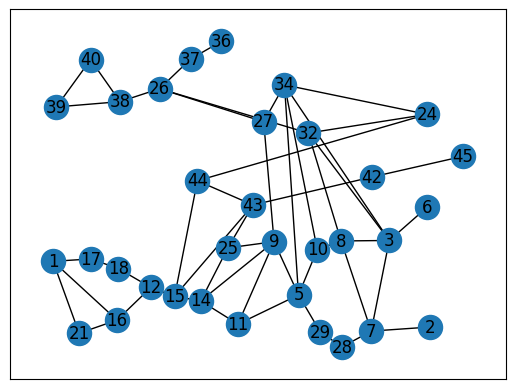

In [40]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
# plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

[[1193.       909.         0.     ]
 [1078.9995   769.         0.     ]
 [1201.       408.         0.     ]
 [1025.       390.99976    0.     ]
 [ 935.00006  766.99963    0.     ]
 [ 863.99915  730.9997     0.     ]
 [ 807.99927  541.9992     0.     ]
 [ 734.99915  764.00006    0.     ]
 [ 626.99866  419.9995     0.     ]
 [ 515.9996   516.99963    0.     ]
 [ 437.99884  535.99963    0.     ]
 [ 366.9971   572.99976    0.     ]
 [ 266.00003  436.9998     0.     ]
 [  74.99976  682.00073    0.     ]
 [ 270.00018  652.0002     0.     ]
 [ 187.9999   692.0002     0.     ]
 [ 153.00008  381.99988    0.     ]
 [ 938.       325.         0.     ]
 [ 873.       387.         0.     ]
 [ 597.00006  738.00006    0.     ]
 [ 837.      1217.         0.     ]
 [1192.      1295.         0.     ]
 [ 704.      1264.         0.     ]
 [ 766.      1418.         0.     ]
 [ 393.00003 1402.         0.     ]
 [ 577.      1599.         0.     ]
 [ 486.      1526.         0.     ]
 [ 275.      1348.         0

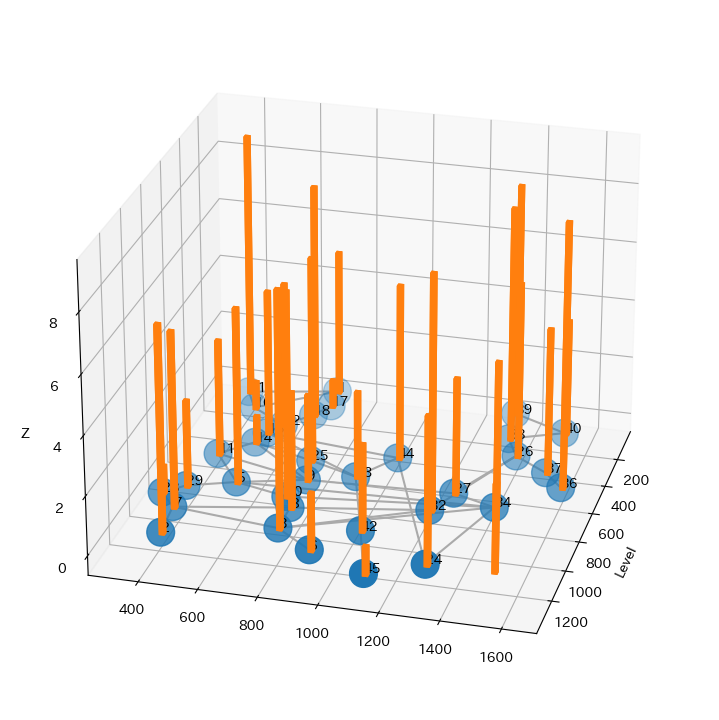

In [41]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

pos = {df["id"][i] : np.array([df["x"][i], df["y"][i], 0], dtype=np.float32) for i in range(len(df))}
# print(pos)
pos_ary = np.array([pos[n] for n in G])
print(pos_ary)

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(
    pos_ary[:, 0],
    pos_ary[:, 1],
    pos_ary[:, 2],
    s=400,
)

# ノードにラベルを表示する
for n in G.nodes:
    ax2.text(*pos[n], n)

# エッジの表示
for e in G.edges:
    node0_pos = pos[e[0]]
    node1_pos = pos[e[1]]
    xx = [node0_pos[0], node1_pos[0]]
    yy = [node0_pos[1], node1_pos[1]]
    zz = [node0_pos[2], node1_pos[2]]
    ax2.plot(xx, yy, zz, c="#aaaaaa")

# bar graph code
x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 20
depth = 20
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')
ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('Level')
# ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z')

plt.show()